In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
group_m = np.array([245, 238, 252, 247, 241, 243, 236, 249, 251, 240, 244, 237, 246, 248, 239, 242, 253, 250, 243, 247])
group_n = np.array([268, 272, 265, 270, 269, 274, 267, 271, 266, 268, 275, 269, 264, 273, 270, 272, 268, 266, 271, 267])

mean_m = np.mean(group_m)
var_m = np.var(group_m, ddof=1)
std_m = np.std(group_m, ddof=1)

mean_n = np.mean(group_n)
var_n = np.var(group_n, ddof=1)
std_n = np.std(group_n, ddof=1)

print("1. Descriptive Statistics:")
print(f"Group M - Mean: {mean_m:.2f}, Variance: {var_m:.2f}, Std Dev: {std_m:.2f}")
print(f"Group N - Mean: {mean_n:.2f}, Variance: {var_n:.2f}, Std Dev: {std_n:.2f}")

# Comment on similarity/difference of variances
variance_ratio = max(var_m, var_n) / min(var_m, var_n)
print(f"Variance ratio (larger/smaller): {variance_ratio:.2f}")
if variance_ratio < 4:
    print("Variances are similar enough; pooled t-test is appropriate.")
else:
    print("Variances differ substantially; pooled t-test may not be appropriate.")


1. Descriptive Statistics:
Group M - Mean: 244.55, Variance: 25.94, Std Dev: 5.09
Group N - Mean: 269.25, Variance: 9.14, Std Dev: 3.02
Variance ratio (larger/smaller): 2.84
Variances are similar enough; pooled t-test is appropriate.


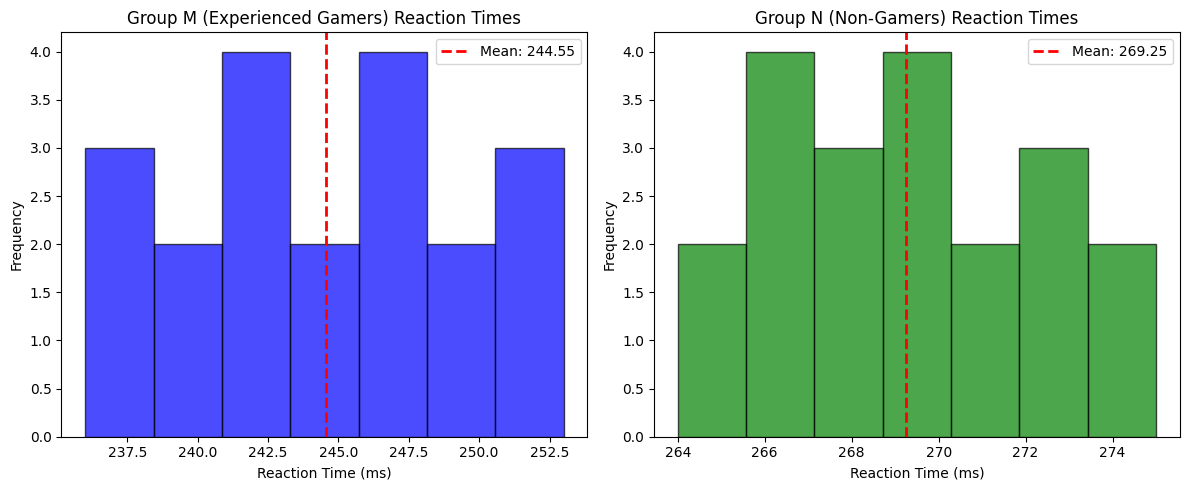

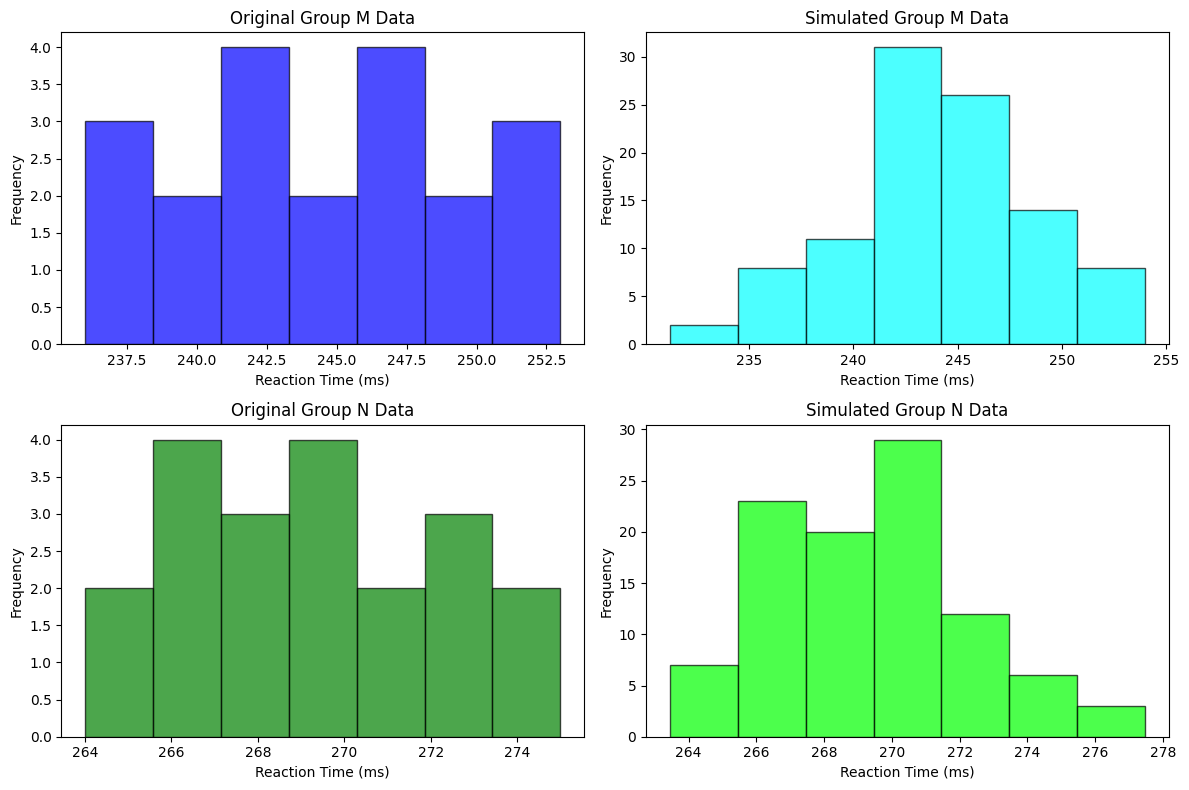


5. Hypothesis Testing (Pooled t-test):
t-statistic: -18.6476
Degrees of freedom: 38
p-value: 0.0000
Reject the null hypothesis (H0): There is a significant difference in means.


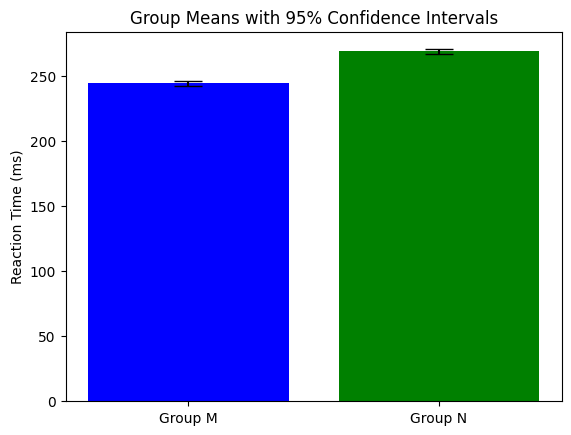


6. Personalized Data Hypothesis Testing:
Added value to Group N data: 3
New mean for Group N: 272.25
New t-statistic: -20.9125
New p-value: 0.0000
Reject the null hypothesis (H0) with personalized data.
Conclusion did NOT change after personalization.


In [7]:
# 2. Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Import the stats module

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(group_m, bins=7, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_m, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_m:.2f}')
plt.title('Group M (Experienced Gamers) Reaction Times')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(group_n, bins=7, alpha=0.7, color='green', edgecolor='black')
plt.axvline(mean_n, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_n:.2f}')
plt.title('Group N (Non-Gamers) Reaction Times')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# 3. Random Number Generation
np.random.seed(42)  # for reproducibility

sim_m = np.random.normal(mean_m, std_m, 100)
sim_n = np.random.normal(mean_n, std_n, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(group_m, bins=7, alpha=0.7, color='blue', edgecolor='black')
plt.title('Original Group M Data')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(sim_m, bins=7, alpha=0.7, color='cyan', edgecolor='black')
plt.title('Simulated Group M Data')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(group_n, bins=7, alpha=0.7, color='green', edgecolor='black')
plt.title('Original Group N Data')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(sim_n, bins=7, alpha=0.7, color='lime', edgecolor='black')
plt.title('Simulated Group N Data')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5. Hypothesis Testing (Pooled t-test)
# H0: mean_M = mean_N
# H1: mean_M != mean_N

n_m = len(group_m)
n_n = len(group_n)

# Pooled variance
pooled_var = ((n_m - 1)*var_m + (n_n - 1)*var_n) / (n_m + n_n - 2)
pooled_std = np.sqrt(pooled_var)

# t-statistic
t_stat = (mean_m - mean_n) / (pooled_std * np.sqrt(1/n_m + 1/n_n))

# degrees of freedom
df = n_m + n_n - 2

# p-value (two-tailed)
p_val = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))

print("\n5. Hypothesis Testing (Pooled t-test):")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis (H0): No significant difference in means.")

# 95% Confidence Intervals for each group mean
ci_m = stats.t.interval(0.95, n_m - 1, loc=mean_m, scale=std_m/np.sqrt(n_m))
ci_n = stats.t.interval(0.95, n_n - 1, loc=mean_n, scale=std_n/np.sqrt(n_n))

plt.bar(['Group M', 'Group N'], [mean_m, mean_n], yerr=[[mean_m - ci_m[0]], [ci_n[1] - mean_n]], capsize=10, color=['blue', 'green'])
plt.title('Group Means with 95% Confidence Intervals')
plt.ylabel('Reaction Time (ms)')
plt.show()

# 6. Unique Personalization
student_id_last_two_digits = 23  # Replace with your actual last two digits
mod_value = student_id_last_two_digits % 5

personalized_group_n = group_n + mod_value

# Recalculate descriptive stats for personalized group N
mean_n_p = np.mean(personalized_group_n)
var_n_p = np.var(personalized_group_n, ddof=1)
std_n_p = np.std(personalized_group_n, ddof=1)

# Pooled variance with personalized data
pooled_var_p = ((n_m - 1)*var_m + (n_n - 1)*var_n_p) / (n_m + n_n - 2)
pooled_std_p = np.sqrt(pooled_var_p)

# t-statistic with personalized data
t_stat_p = (mean_m - mean_n_p) / (pooled_std_p * np.sqrt(1/n_m + 1/n_n))

# p-value personalized
p_val_p = 2 * (1 - stats.t.cdf(np.abs(t_stat_p), df))

print("\n6. Personalized Data Hypothesis Testing:")
print(f"Added value to Group N data: {mod_value}")
print(f"New mean for Group N: {mean_n_p:.2f}")
print(f"New t-statistic: {t_stat_p:.4f}")
print(f"New p-value: {p_val_p:.4f}")

if p_val_p < alpha:
    print("Reject the null hypothesis (H0) with personalized data.")
else:
    print("Fail to reject the null hypothesis (H0) with personalized data.")

if (p_val < alpha) != (p_val_p < alpha):
    print("Conclusion changed after personalization.")
else:
    print("Conclusion did NOT change after personalization.")